(a) [10 marks] Recall that in ridge regression, we solve the problem minβ
λ
2
∥β∥
2
2 + ∥y − Xβ∥
2
2
.
Using the first order optimality conditions, show that X⊤Xβ + λβ = X⊤y holds, and show
that this can be equivalently written as β = X⊤α where α =
1
λ
(y − Xβ). Further show that
α = (X⊤X + λI)
−1y. Note that in this relation X⊤X can be effectively replaced by a kernel
matrix using the kernel function idea discussed in class as α = (K + λI)
−1y. Now, represent the
inference function ⟨β, x⟩ using α and hence using kernels. This extension to ridge regression is
called kernel ridge regression.


# **Answer for this question is written in pdf file named Question 2 part (a)**

(b) [1 mark] Read the data set in Data Q2.csv into a pandas dataframe.

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [72]:
data = pd.read_csv('Data_Q2.csv')
data

Temperature  Humidity  Wind Speed     Flow  Consumption
0          5.578     93.00       0.082    0.185  5935.174070
1         15.510     64.38       0.085    0.133  6044.657863
2         15.730     64.21       0.084    0.152  6061.944778
3         15.620     65.22       0.083    0.145  6108.043217
4         15.450     67.69       0.083    0.189  6119.567827
..           ...       ...         ...      ...          ...
995       17.330     42.24       4.917   31.540  9443.855422
996        7.010     76.40       4.920   65.890  9449.638554
997       14.810     82.30       4.913    0.159  9449.638554
998       12.090     77.40       0.073    0.104  9449.638554
999       16.680     64.92       0.079  112.400  9449.990000

[1000 rows x 5 columns]

(c) Perform standardization of each column in the data frame and create a new data
frame.

In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

In [74]:
scalar=StandardScaler()
data_std=scalar.fit_transform(data)

In [75]:
data_std=pd.DataFrame(data_std,columns=data.columns)

In [76]:
data_std

Temperature  Humidity  Wind Speed      Flow  Consumption
0      -1.931878  1.404846   -0.641791 -0.664370    -3.450208
1       0.407654 -0.874474   -0.640417 -0.665724    -3.282442
2       0.459476 -0.888013   -0.640875 -0.665229    -3.255953
3       0.433565 -0.807575   -0.641333 -0.665412    -3.185315
4       0.393521 -0.610863   -0.641333 -0.664266    -3.167655
..           ...       ...         ...       ...          ...
995     0.836365 -2.637721    1.572655  0.152039     1.926266
996    -1.594563  0.082809    1.574029  1.046430     1.935127
997     0.242766  0.552690    1.570823 -0.665047     1.935127
998    -0.397944  0.162450   -0.645913 -0.666479     1.935127
999     0.683254 -0.831468   -0.643165  2.257439     1.935666

[1000 rows x 5 columns]

In [77]:
data_std.describe()

Temperature      Humidity    Wind Speed         Flow   Consumption
count  1.000000e+03  1.000000e+03  1.000000e+03  1000.000000  1.000000e+03
mean   1.989520e-16  1.563194e-16  7.460699e-17     0.000000 -1.591616e-15
std    1.000500e+00  1.000500e+00  1.000500e+00     1.000500  1.000500e+00
min   -2.171202e+00 -2.908500e+00 -6.504934e-01    -0.668041 -3.450208e+00
25%   -7.400875e-01 -7.560080e-01 -6.427073e-01    -0.665516 -6.790723e-01
50%    1.897660e-01  2.420906e-01 -6.408753e-01    -0.524340  1.096184e-01
75%    7.786535e-01  8.871812e-01  1.570823e+00     0.308264  7.168465e-01
max    2.468761e+00  1.540236e+00  1.609753e+00     6.407833  1.935666e+00

(d) [1 marks] Split the data into two sets such that 80% of the data is considered as set T1 and
20% of the data is considered as set T2. Justify if the splits T1 and T2 have similar spread in
Consumption column.

In [78]:
data_X=data_std[data.columns[:-1]]
data_Y=data_std[data.columns[-1]]
X_train,X_test,Y_train,Y_test=train_test_split(data_X,data_Y,test_size=0.2,random_state=30)


In [79]:
print('number of training data point :',len(X_train),'number of test data point:',len(X_test))

number of training data point : 800 number of test data point: 200


In [80]:
print('Spread of Consumption column in training data :',np.array(Y_train).max()-np.array(Y_train).min()) 

Spread of Consumption column in training data : 5.218108132975011


In [81]:
print('Spread of Consumption column in test data :',np.array(Y_test).max()-np.array(Y_test).min()) 

Spread of Consumption column in test data : 5.385335400255034


In the above cells, we can see that T1 and T2 have approximately same the spread of consumption column.

(e) [3 marks] Using T1 as training data, train kernel ridge regression model. Use RBF kernel and
tune the gamma parameter using 5-fold cross-validation.

In [82]:
# Define the range of hyperparameters to be optimized
params = {'alpha': [0.001,0.01,0.1, 1, 100], 'gamma': [0.001,0.01, 0.1, 1,10,100]} 

# Define the number of folds for cross-validation
KF = KFold(n_splits=5) 

# Perform grid search over the hyperparameters using cross-validation
KRR = GridSearchCV(KernelRidge(kernel='rbf'), params, cv=KF )
KRR.fit(X_train, Y_train) 

# Print the optimal hyperparameters
print('Optimal hyperparameters:', KRR.best_params_)
best_alpha=KRR.best_params_['alpha']
best_gamma=KRR.best_params_['gamma']

final_KRR=KernelRidge(kernel='rbf',alpha=best_alpha,gamma=best_gamma)
final_KRR.fit(X_train,Y_train)

y_pred=final_KRR.predict(X_test) 

print(mean_squared_error(Y_test,y_pred))


Optimal hyperparameters: {'alpha': 1, 'gamma': 10}
0.7978078543899605


(f) [2 marks] Compute and display the RMSE and R2 values on the training set T1 and test set
T2

In [83]:
# RMSE and R2 values
print('For T1 data set:')
y_pred=final_KRR.predict(X_train)
print('RMSE Value for T1 data is:',(mean_squared_error(Y_train,y_pred,squared=False)))
print('R2 value for T1 data  is :',r2_score(Y_train,y_pred))
print('For T2 data set:')
y_pred=final_KRR.predict(X_test)
print('RMSE Value for T2 data is:',(mean_squared_error(Y_test,y_pred,squared=False)))
print('R2 value for T2 data  is :',r2_score(Y_test,y_pred))



For T1 data set:
RMSE Value for T1 data is: 0.6349301876914875
R2 value for T1 data  is : 0.5893199758527949
For T2 data set:
RMSE Value for T2 data is: 0.8932009037108956
R2 value for T2 data  is : 0.25645973829565927


(g) [2 marks] Consider the original data in Data Q2.csv and load it into a different pandas dataframe
called frame2. Add another column with name Class to the data frame frame2 such that the
following hold:

In [84]:
frame2 = pd.read_csv('Data_Q2.csv')
frame2

Temperature  Humidity  Wind Speed     Flow  Consumption
0          5.578     93.00       0.082    0.185  5935.174070
1         15.510     64.38       0.085    0.133  6044.657863
2         15.730     64.21       0.084    0.152  6061.944778
3         15.620     65.22       0.083    0.145  6108.043217
4         15.450     67.69       0.083    0.189  6119.567827
..           ...       ...         ...      ...          ...
995       17.330     42.24       4.917   31.540  9443.855422
996        7.010     76.40       4.920   65.890  9449.638554
997       14.810     82.30       4.913    0.159  9449.638554
998       12.090     77.40       0.073    0.104  9449.638554
999       16.680     64.92       0.079  112.400  9449.990000

[1000 rows x 5 columns]

In [85]:
def cla(x):
  if x<=6500:
    return 1
  elif x>6500 and x<=7000:
    return 2
  elif x>7000 and x<=7500:
    return 3
  elif x>7500 and x<=8000:
    return 4
  elif x>8000 and x<=8500:
    return 5
  elif x>8500 and x<=9000:
    return 6
  else:
    return 7 

In [86]:
frame2['class'] = frame2['Consumption'].apply(cla)

In [87]:
frame2

Temperature  Humidity  Wind Speed     Flow  Consumption  class
0          5.578     93.00       0.082    0.185  5935.174070      1
1         15.510     64.38       0.085    0.133  6044.657863      1
2         15.730     64.21       0.084    0.152  6061.944778      1
3         15.620     65.22       0.083    0.145  6108.043217      1
4         15.450     67.69       0.083    0.189  6119.567827      1
..           ...       ...         ...      ...          ...    ...
995       17.330     42.24       4.917   31.540  9443.855422      7
996        7.010     76.40       4.920   65.890  9449.638554      7
997       14.810     82.30       4.913    0.159  9449.638554      7
998       12.090     77.40       0.073    0.104  9449.638554      7
999       16.680     64.92       0.079  112.400  9449.990000      7

[1000 rows x 6 columns]

(h) [2 marks] Perform standardization of samples in frame2 belonging to each class separately.
Ignore Class column during standardization procedure.

In [88]:
data_std=pd.DataFrame()
for i in range(1,8):
  data_label=frame2[frame2['class']==i]
  data_X=data_label[data_label.columns[:-1]]
  scaler=StandardScaler()
  data_X=scaler.fit_transform(data_X) 
  df=pd.DataFrame(data_X,columns=data.columns)
  data_std=pd.concat([data_std,df])
data_std=data_std.reset_index(drop=True)
data_std['class']=frame2['class'] 

In [89]:
data_std

Temperature  Humidity  Wind Speed      Flow  Consumption  class
0      -1.690575  1.563325   -0.508727 -0.365626    -1.925782      1
1       1.083295 -1.525195    0.581402 -0.412271    -1.304210      1
2       1.144738 -1.543541    0.218026 -0.395227    -1.206067      1
3       1.114017 -1.434547   -0.145350 -0.401507    -0.944353      1
4       1.066538 -1.167998   -0.145350 -0.362038    -0.878924      1
..           ...       ...         ...       ...          ...    ...
995     0.572096 -2.357184    1.585485 -0.112966     1.711956      7
996    -1.984162  0.416500    1.586861  0.552813     1.753338      7
997    -0.052107  0.895561    1.583650 -0.721200     1.753338      7
998    -0.725849  0.497697   -0.636763 -0.722266     1.753338      7
999     0.411091 -0.515640   -0.634011  1.454281     1.755853      7

[1000 rows x 6 columns]

In [90]:
data_std.describe()

Temperature      Humidity    Wind Speed          Flow   Consumption  \
count  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03   
mean   1.989520e-16 -2.700062e-16  2.842171e-17 -7.815970e-17  2.685852e-15   
std    1.000500e+00  1.000500e+00  1.000500e+00  1.000500e+00  1.000500e+00   
min   -2.425609e+00 -2.712508e+00 -1.235479e+00 -7.647604e-01 -1.925782e+00   
25%   -7.719997e-01 -7.423306e-01 -6.744326e-01 -7.277721e-01 -8.379542e-01   
50%    1.856897e-01  2.349829e-01 -5.941244e-01 -3.953413e-01 -3.550668e-02   
75%    7.960005e-01  8.308760e-01  1.335877e+00  3.144329e-01  7.273129e-01   
max    2.288653e+00  1.649531e+00  3.125035e+00  5.594999e+00  2.732299e+00   

             class  
count  1000.000000  
mean      4.894000  
std       1.329109  
min       1.000000  
25%       4.000000  
50%       5.000000  
75%       6.000000  
max       7.000000

(i) [4 marks] Split frame2 into train and test splits T3 and T4, such that the samples in T3 are
the same as in T1. Consider T3 as training set, ignore the Consumption column and considering
Class as labels, train a kernel SVM model with RBF kernel. Tune gamma parameter using 5
fold cross-validation. Take care of class imbalance issues if they exist.

In [93]:
data_std_X=data_std[data_std.columns[:-1]]
data_std_Y=data_std[data_std.columns[-1]]
X_train,X_test,Y_train,Y_test=train_test_split(data_std_X,data_std_Y,test_size=0.2,random_state=30)

In [94]:
T3_data=pd.concat([X_train,Y_train],axis=1)
T4_data=pd.concat([X_test,Y_test],axis=1)

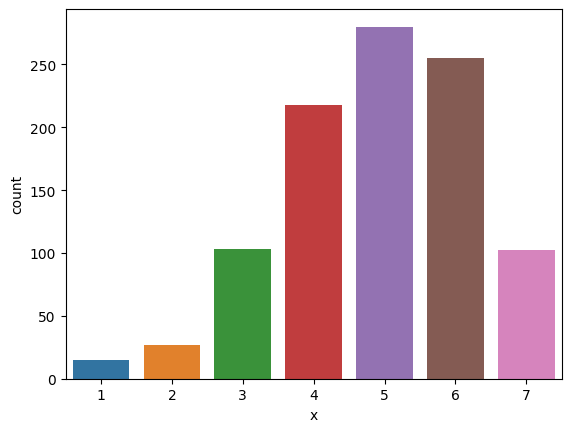

In [95]:
df=pd.DataFrame(np.array(data_std['class']),columns=['x'])
ax=sns.countplot(x='x',data=df)

As we can see that there is class imbalance issue in the given data so now we will try oversampling to overcome this situation

In [96]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=3)

X_resampled, y_resampled = ros.fit_resample(X_train, Y_train)

In [97]:
# here we update T3 data by oversampling
T3_data_ovr=pd.concat([X_resampled,y_resampled],axis=1).reset_index(drop=True)


In [98]:
T3_data_ovr

Temperature  Humidity  Wind Speed      Flow  Consumption  class
0       -1.211766  0.409698    1.691929  0.087141     0.092557      6
1       -0.029307 -0.441495    1.503275  0.391835     1.404759      4
2        1.170436  0.316696   -0.679839 -0.093142    -0.559762      4
3        0.337980  0.409698    1.690037 -0.036132     0.701017      6
4        1.101054 -1.231523   -0.751102 -0.729820     1.282872      5
...           ...       ...         ...       ...          ...    ...
1577     0.039542  1.204110   -0.637222 -0.721472    -0.150259      7
1578    -0.480627 -0.837991   -0.633093 -0.510496     0.726375      7
1579     1.443998  0.692569   -0.526201 -0.722480     0.148845      7
1580    -2.084976  1.260947   -0.631258 -0.720910     1.221178      7
1581     0.572096 -2.357184    1.585485 -0.112966     1.711956      7

[1582 rows x 6 columns]

 After oversampling  For train data (T3_data_ovr)

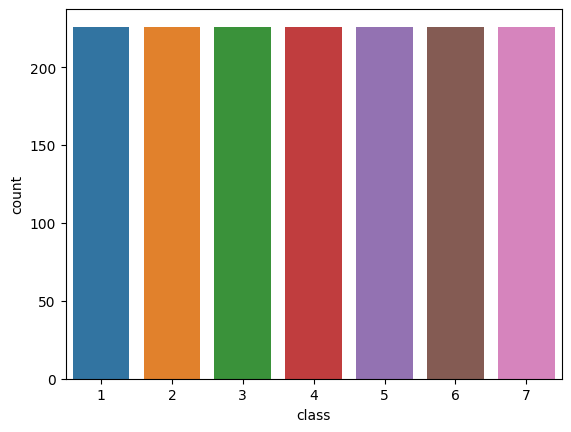

In [99]:
ax=sns.countplot(x='class',data=T3_data_ovr)

After oversampling, So in above cell class imbalance issue is solve.

In [100]:
T3_data_ovr

Temperature  Humidity  Wind Speed      Flow  Consumption  class
0       -1.211766  0.409698    1.691929  0.087141     0.092557      6
1       -0.029307 -0.441495    1.503275  0.391835     1.404759      4
2        1.170436  0.316696   -0.679839 -0.093142    -0.559762      4
3        0.337980  0.409698    1.690037 -0.036132     0.701017      6
4        1.101054 -1.231523   -0.751102 -0.729820     1.282872      5
...           ...       ...         ...       ...          ...    ...
1577     0.039542  1.204110   -0.637222 -0.721472    -0.150259      7
1578    -0.480627 -0.837991   -0.633093 -0.510496     0.726375      7
1579     1.443998  0.692569   -0.526201 -0.722480     0.148845      7
1580    -2.084976  1.260947   -0.631258 -0.720910     1.221178      7
1581     0.572096 -2.357184    1.585485 -0.112966     1.711956      7

[1582 rows x 6 columns]

In [101]:
T4_data.head()

Temperature  Humidity  Wind Speed      Flow  Consumption  class
923     0.141099  1.017357   -0.628505 -0.721976    -0.970867      7
921    -2.095627  0.481458    1.587320  1.834173    -0.977910      7
516     1.030735  0.771251    1.336310 -0.601558     0.202609      5
87     -1.334991  1.018371   -0.544139 -0.508115    -0.264578      3
879     1.206437  0.804190    1.691456 -0.763581     2.015956      6

In [102]:
X_train=T3_data_ovr[T3_data_ovr.columns[:-2]].reset_index(drop=True)
Y_train=T3_data_ovr[T3_data_ovr.columns[-1]].reset_index(drop=True)
X_test=T4_data[T4_data.columns[:-2]].reset_index(drop=True)
Y_test=T4_data[T4_data.columns[-1]].reset_index(drop=True) 

In [103]:
X_test

Temperature  Humidity  Wind Speed      Flow
0       0.141099  1.017357   -0.628505 -0.721976
1      -2.095627  0.481458    1.587320  1.834173
2       1.030735  0.771251    1.336310 -0.601558
3      -1.334991  1.018371   -0.544139 -0.508115
4       1.206437  0.804190    1.691456 -0.763581
..           ...       ...         ...       ...
195     1.084154 -0.827721   -0.599325  0.669970
196     0.672110  0.606381    1.335445 -0.728796
197    -1.721601  1.350264   -0.632634 -0.721917
198    -0.425663 -2.429039    1.695238  0.098937
199     1.156666 -0.367862   -0.637681  2.268335

[200 rows x 4 columns]

In [104]:
T3_data=T3_data.reset_index(drop=True)
T3_data.head()

Temperature  Humidity  Wind Speed      Flow  Consumption  class
0    -1.211766  0.409698    1.691929  0.087141     0.092557      6
1    -0.029307 -0.441495    1.503275  0.391835     1.404759      4
2     1.170436  0.316696   -0.679839 -0.093142    -0.559762      4
3     0.337980  0.409698    1.690037 -0.036132     0.701017      6
4     1.101054 -1.231523   -0.751102 -0.729820     1.282872      5

In [106]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],'gamma': [0.001, 0.01, 0.1, 1,10,100,1000]}
# Use cross-validation on the training set to evaluate the performance of the logistic regression model for each value of C
kernel_SVM = SVC(kernel='rbf')
grid_search = GridSearchCV(kernel_SVM, param_grid,  cv=5)
grid_search.fit(X_train, Y_train)


best_gamma = grid_search.best_params_['gamma']
print(f"Best gamma:{best_gamma}")

# Train the final logistic regression model using the selected value of C and the entire training set
final_kernel_SVM = SVC(kernel='rbf',gamma=best_gamma)
final_kernel_SVM.fit(X_train, Y_train)

#for T3 data set
y_pred_T3=final_kernel_SVM.predict(T3_data[T3_data.columns[:-2]])
print(y_pred_T3)

# Evaluate the performance of the final model on the test set to estimate its performance on unseen data
y_pred_T4 = final_kernel_SVM.predict(X_test)
print('for T4 ',y_pred_T4)

Best gamma:1
[4 4 3 3 4 4 4 7 6 7 5 7 2 7 7 7 6 4 7 5 7 7 3 6 4 7 5 7 3 7 7 5 4 5 6 3 5
 3 6 4 6 4 4 7 3 6 4 7 7 6 7 5 3 5 6 7 5 2 5 3 4 3 5 4 5 6 5 6 3 7 5 6 7 2
 1 5 5 6 3 4 4 4 4 3 4 4 7 7 4 6 6 3 5 5 3 6 6 5 3 5 7 4 7 3 4 4 7 5 3 5 7
 3 3 5 6 5 3 5 3 7 4 7 3 3 6 3 6 2 4 6 7 4 2 5 7 5 6 5 4 4 7 5 4 3 5 3 4 5
 4 6 5 6 4 3 6 4 4 7 4 4 4 7 4 6 4 6 5 7 7 7 5 5 6 5 3 5 4 4 2 4 2 6 3 5 4
 6 5 7 4 4 3 5 5 6 4 5 5 5 2 6 5 5 7 6 6 6 7 7 4 3 4 5 5 5 5 6 5 3 4 4 2 7
 5 5 5 5 5 7 7 5 5 7 7 3 4 5 4 6 4 3 5 4 5 4 5 7 3 4 6 7 4 7 7 4 7 7 3 4 5
 4 4 4 4 7 6 5 5 5 5 4 4 6 7 7 4 4 5 2 4 6 7 6 6 3 7 5 7 3 4 7 4 4 3 6 7 7
 5 6 6 6 5 7 3 3 3 5 4 2 6 6 6 4 5 5 5 4 4 4 4 7 7 7 7 6 2 5 1 4 6 7 3 5 6
 5 7 5 4 5 7 4 2 7 7 7 5 3 5 6 5 7 6 5 5 4 6 7 6 5 4 4 4 5 6 2 7 5 3 5 2 4
 7 6 4 5 7 7 4 6 7 4 5 5 5 7 7 6 3 5 5 7 4 4 7 2 7 6 7 7 5 6 1 5 6 5 6 4 6
 7 7 7 4 6 7 6 4 2 7 6 2 5 7 5 4 5 6 4 3 3 7 6 4 5 4 6 7 6 5 6 7 5 1 5 4 6
 5 6 5 5 3 3 4 3 2 5 5 6 5 7 4 4 7 5 6 3 4 5 7 7 7 6 5 1 5 4 7 4 3 5 7 4 5
 7 4 3 1 6 4

(j) Now consider samples belonging to a particular class i in T3: build a kernel ridge
regression model with RBF kernel (ignore the Class column for this task). Tune gamma parameter using 5 fold cross-validation restricted to samples belonging to only class i. Repeat this
for each class. Thus, at the end, for each class i, you would now have a kernel ridge regression
model Mi
.

In [107]:
ridge_reg_models={}
for i in range(1,8):
  # for state i
  data_sample=T3_data[T3_data['class']==i]
  data_sample_X=data_sample[data_sample.columns[:-2]]
  data_sample_Y=data_sample[data_sample.columns[-2]]

  # fitting into ridge regression 
  # Define the range of hyperparameters to be optimized
  params = { 'gamma': [0.001,0.01, 0.1, 1,10,100]}

  # Define the number of folds for cross-validation
  kf = KFold(n_splits=5)

  # Perform grid search over the hyperparameters using cross-validation
  krr = GridSearchCV(KernelRidge(kernel='rbf'), params, cv=kf )
  krr.fit(data_sample_X, data_sample_Y)

  # Print the optimal hyperparameters
  print('Optimal hyperparameters:', krr.best_params_)

  best_gamma=krr.best_params_['gamma']

  final_krr=KernelRidge(kernel='rbf',gamma=best_gamma)
  final_krr.fit(data_sample_X, data_sample_Y)
  ridge_reg_models[f'M{i}']=final_krr

Optimal hyperparameters: {'gamma': 1}
Optimal hyperparameters: {'gamma': 1}
Optimal hyperparameters: {'gamma': 0.01}
Optimal hyperparameters: {'gamma': 10}
Optimal hyperparameters: {'gamma': 0.01}
Optimal hyperparameters: {'gamma': 10}
Optimal hyperparameters: {'gamma': 10}


In [108]:
ridge_reg_models

{'M1': KernelRidge(gamma=1, kernel='rbf'),
 'M2': KernelRidge(gamma=1, kernel='rbf'),
 'M3': KernelRidge(gamma=0.01, kernel='rbf'),
 'M4': KernelRidge(gamma=10, kernel='rbf'),
 'M5': KernelRidge(gamma=0.01, kernel='rbf'),
 'M6': KernelRidge(gamma=10, kernel='rbf'),
 'M7': KernelRidge(gamma=10, kernel='rbf')}

(k) For testing (or) inference, implement the following procedure: for any sample, first
predict the class label as j and then based on the class label j, use model Mj to predict the
Consumption value. Using this procedure, find the RMSE values for T3 and T4.

In [109]:
T4_data.head()

Temperature  Humidity  Wind Speed      Flow  Consumption  class
923     0.141099  1.017357   -0.628505 -0.721976    -0.970867      7
921    -2.095627  0.481458    1.587320  1.834173    -0.977910      7
516     1.030735  0.771251    1.336310 -0.601558     0.202609      5
87     -1.334991  1.018371   -0.544139 -0.508115    -0.264578      3
879     1.206437  0.804190    1.691456 -0.763581     2.015956      6

In [110]:
X_test.head()

Temperature  Humidity  Wind Speed      Flow
0     0.141099  1.017357   -0.628505 -0.721976
1    -2.095627  0.481458    1.587320  1.834173
2     1.030735  0.771251    1.336310 -0.601558
3    -1.334991  1.018371   -0.544139 -0.508115
4     1.206437  0.804190    1.691456 -0.763581

In [111]:
# T4 data-> test data 
consumption_pred_T4=[]
for i in range(len(y_pred_T4)):
  pred=ridge_reg_models[f'M{y_pred_T4[i]}'].predict(X_test)
  consumption_pred_T4.append(pred[i])

In [112]:
# T3data 
consumption_pred_T3=[]
for i in range(len(y_pred_T3)):
  pred=ridge_reg_models[f'M{y_pred_T3[i]}'].predict(T3_data[T3_data.columns[:-2]])
  consumption_pred_T3.append(pred[i])

In [114]:
print('For T4 data RMSE value:',mean_squared_error(T4_data['Consumption'],consumption_pred_T4,squared=False))
print('For T3 data RMSE value :',mean_squared_error(T3_data['Consumption'],consumption_pred_T3,squared=False))

For T4 data RMSE value: 1.0747689140475318
For T3 data RMSE value : 0.8754937050148767


(l) Compare and contrast the RMSE values obtained in part (f) and part (k). Using
your observations, suggest when the two-stage approach of classification-followed-by-regression
would be useful when compared to the simple regression approach on the full data set.

In [115]:
print('Simple Regression approach:')
print('for T1 data RMSE value:',0.6349301876914875)
print(' for T2 data RMSE value:',0.8932009037108956)
print(' Two stage approach :')
print('RMSE value for T3 data:',0.8754937050148767)
print('RMSE value for T4 data:',1.0747689140475318)

Simple Regression approach:
for T1 data RMSE value: 0.6349301876914875
 for T2 data RMSE value: 0.8932009037108956
 Two stage approach :
RMSE value for T3 data: 0.8754937050148767
RMSE value for T4 data: 1.0747689140475318


# **Observation:**

By using Simple Regression Approach I get lower RMSE value for unseen data which indicates simple regression approach is good than two stage approach of classification the follow by regression.